In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

warnings.filterwarnings('ignore')

In [2]:
def tsne_function(x):
    pca = PCA(n_components=12)
    pca_result = pca.fit_transform(x)
    tsne = TSNE(random_state=123).fit_transform(pca_result)

    return tsne

In [3]:
data = pd.read_csv('data/upload/train_feature.csv')

X = np.array(data.iloc[:, 0:-1])
y = np.array(data.iloc[:, -1])

tsne_result = tsne_function(X)

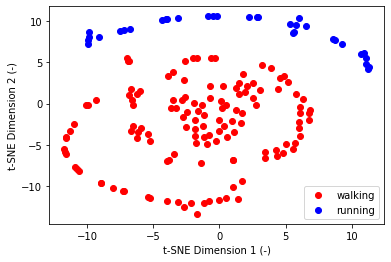

In [4]:
tsne_df = pd.DataFrame({'t_SNE_1': tsne_result[:,0],
                       't_SNE_2': tsne_result[:,1],
                       'class': y.astype(int)})

plt.scatter(tsne_df[tsne_df['class']==0]['t_SNE_1'], tsne_df[tsne_df['class']==0]['t_SNE_2'], c='red', label='walking')
plt.scatter(tsne_df[tsne_df['class']==1]['t_SNE_1'], tsne_df[tsne_df['class']==1]['t_SNE_2'], c='blue', label='running')

plt.xlabel('t-SNE Dimension 1 (-)')
plt.ylabel('t-SNE Dimension 2 (-)')
plt.legend()